In [19]:
%%capture hide_output
%load_ext autoreload
%autoreload 2
%matplotlib inline

import nltk
import validators
import matplotlib.pyplot as plt
import numpy as np

import markov_with_syllables as markov
from syllablizer import syllablize
from analysis import analyze_markov_syllables as analyze
import get_text
from tfidf import num_nonzero_tokens

nltk.download("words")

[nltk_data] Downloading package words to /home/softdes/nltk_data...
[nltk_data]   Package words is already up-to-date!


We found a number of selections of texts, including books from Project Gutenberg and, and we created a dictionary of thoese texts in `get_text.py`, which contains helper functions to get those books as strings for analysis.

In [20]:
corpora = get_text.get_texts("all")
titles = list(corpora.keys())
texts = list(corpora.values())
print(f"Texts in the dictionary are: {list(titles)}")

Texts in the dictionary are: ['Iliad', 'Canterbury Tales', 'Romeo and Juliet', 'Great Gatsby', 'Monty Python', "Finnegan's Wake"]


If we want to add a limited selection of texts to our dictionary for analysis, or if we later want to add additional texts to our analysis corpora we can use the function `add_text`.

Next, we use functions from `helper.py` to give some data about our corpora.

In [24]:
max_words = 10000
#texts_analysis = analyze(texts, max_words=max_words, verbose=False)
num_tokens = num_nonzero_tokens(titles)

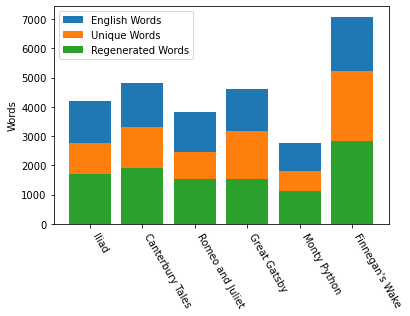

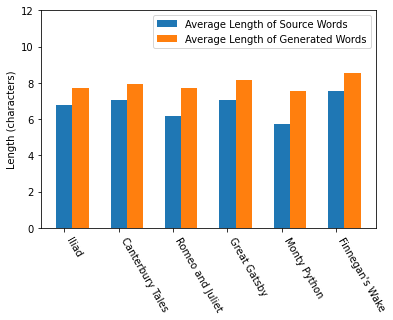

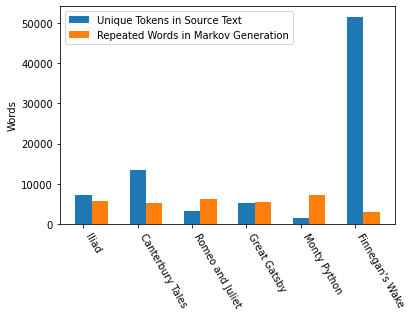

In [25]:
unique = []
regen = []
ur_sum = []
english = []
ure_sum = []
repeats = []
word_len = []
markov_len = []
for index in range(len(corpora)):
    analysis = texts_analysis[index]
    unique.append(analysis["unique_count"])
    regen.append(analysis["regenerated_count"])
    english.append(analysis["english_count"])
    ur_sum.append(unique[-1] + regen[-1])
    ure_sum.append(ur_sum[-1] + english[-1])
    repeats.append(max_words - ure_sum[-1])
    word_len.append(analysis["average_word_length"])
    markov_len.append(analysis["average_unique_markov_word_length"])

fig, ax = plt.subplots()
ax.bar(titles, english, label="English Words", bottom=ur_sum)
ax.bar(titles, unique, label="Unique Words", bottom=regen)
ax.bar(titles, regen, label="Regenerated Words")
ax.set_ylabel("Words")
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_horizontalalignment("left")
ax.legend()
plt.show()

fig, ax = plt.subplots()
width = 0.3
indexes = np.arange(len(corpora))
ax.bar(titles, word_len, width, label="Average Length of Source Words")
ax.bar(indexes+width, markov_len, width, label="Average Length of Generated Words")
ax.set_ylabel("Length (characters)")
ax.set_ylim([0, 12])
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_horizontalalignment("left")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.bar(titles, num_tokens, width, label="Unique Tokens in Source Text")
ax.bar(indexes+width, repeats, width, label="Repeated Words in Markov Generation")
ax.set_ylabel("Words")
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_horizontalalignment("left")
ax.legend()
plt.show()

[7246, 13453, 3255, 5273, 1483, 51617]
[5816, 5180, 6189, 5401, 7238, 2920]
[6.7549377280161025, 7.0590296993174695, 6.158622636184025, 7.0712319339298, 5.71830985915493, 7.537705817782657]
1435634
